<div align='center'> <h1> Alzheimer Detection CNN </h1> </div>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_dataset = tf.keras.preprocessing.image_dataset_from_directory("D:/python/AlzheimerCNN/data/train" , image_size=(176,208) , batch_size=32, label_mode='categorical')
test_dataset = tf.keras.preprocessing.image_dataset_from_directory("D:/python/AlzheimerCNN/data/test" , image_size=(176,208) , batch_size=32, label_mode='categorical')

Found 5121 files belonging to 4 classes.
Found 1279 files belonging to 4 classes.


<h2> Visualize Different Stages Of Alzheimer</h2>

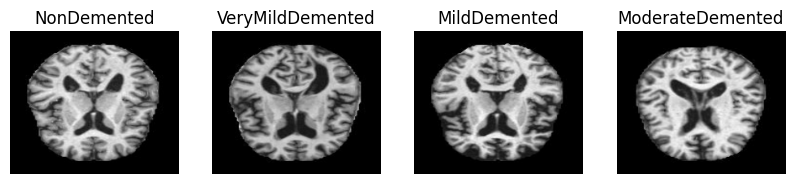

In [3]:
class_names = train_dataset.class_names 
class_images = {}


for image_batch, labels_batch in train_dataset.take(10): 
    for i in range(len(image_batch)):
        label_idx = np.argmax(labels_batch[i]) 
        class_name = class_names[label_idx]

        if class_name not in class_images:
            class_images[class_name] = image_batch[i].numpy()

        if len(class_images) == 4:
            break
    if len(class_images) == 4:
        break

plt.figure(figsize=(10, 5))
for i, (class_name, image) in enumerate(class_images.items()):
    plt.subplot(1, 4, i + 1)
    plt.imshow(image.astype("uint8")) 
    plt.title(class_name)
    plt.axis("off")

plt.show()

<h2> Visualize Augmented v Original Pictures </h2>

In [4]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
])

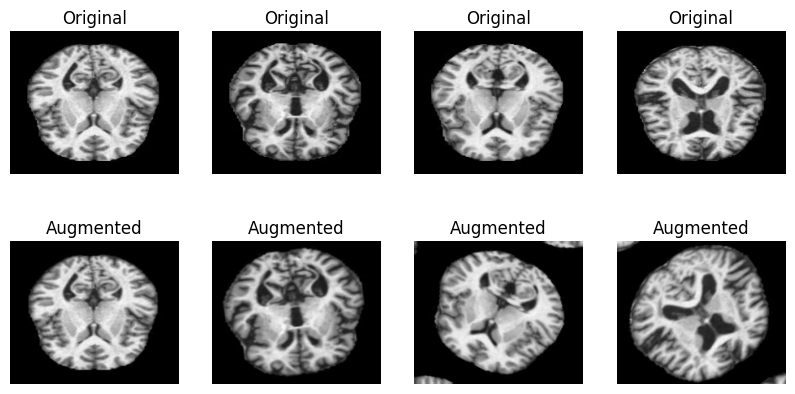

In [5]:
import matplotlib.pyplot as plt

for image_batch, _ in train_dataset.take(1):  
    original_images = image_batch[:4]
    break

augmented_images = data_augmentation(original_images, training=True)

plt.figure(figsize=(10, 5))
for i in range(4):
    plt.subplot(2, 4, i + 1)
    plt.imshow(original_images[i].numpy().astype("uint8"))
    plt.title("Original")
    plt.axis("off")
    
    plt.subplot(2, 4, i + 5)
    plt.imshow(augmented_images[i].numpy().astype("uint8"))
    plt.title("Augmented")
    plt.axis("off")

plt.show()

<h2> Class Distribution</h2>

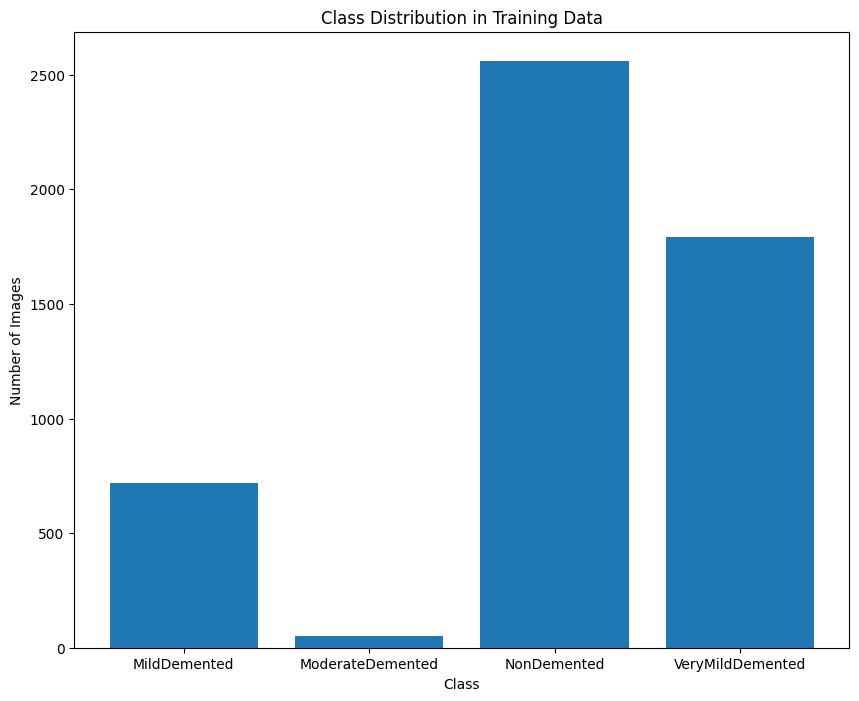

In [11]:
import numpy as np
import matplotlib.pyplot as plt

class_counts = np.zeros(4)
for _, labels in train_dataset:
    class_counts += np.sum(labels.numpy(), axis=0)

plt.figure(figsize=(10, 8)) 
plt.bar(class_names, class_counts)
plt.title("Class Distribution in Training Data")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.show()


<h2> Class Weightage </h2>

In [12]:
sum_class_counts = np.sum(class_counts)

for i, class_count in enumerate(class_counts):
    print(f'{class_names[i]}: {class_count/sum_class_counts*100:.2f}%')

MildDemented: 14.00%
ModerateDemented: 1.02%
NonDemented: 49.99%
VeryMildDemented: 34.99%
